# A/B test  for an international online store

 ## Contents <a id='back'></a>
 * [Introduction](#intro)
     * [Project Puropse](#project_puropse)
     * [Data Description](#data_description)
 * [Task decomposition](#task_decomposition)
     * [Data preprocessing](#data_preprocessing)
     * [Exploratory data analysis](#exploratory_data_analysis)
     * [Testing hypotheses](#testing_hypotheses)
     * [Working with business metrics and indicators](#working_with_business_metrics_and_indicators)
     * [Preparing a presentation](#preparing_a_presentation)
     * [Build a dashboard](#build_a_dashboard)

## Introduction <a id='data_review'></a>


### Project Purpose

The relaunching of an A/B test  for an international online store

**The Technical description left from the previous test:**

- Test name: `recommender_system_test`
- Groups: А (control), B (new payment funnel)
- Launch date: 2020-12-07
- Date when they stopped taking up new users: 2020-12-21
- End date: 2021-01-01
- Audience: 15% of the new users from the EU region
- Purpose of the test: testing changes related to the introduction of an improved recommendation system
- Expected result: within 14 days of signing up, users will show better conversion into product page views (the `product_page` event), instances of adding items to the shopping cart (`product_cart`), and purchases (`purchase`). At each stage of the funnel `product_page → product_cart → purchase`, there will be at least a 10% increase.
- Expected number of test participants: 6000


### Data Description
    
#### Structure of ab_project__marketing_events_us.csv:

The marketing events dataset (`ab_project__marketing_events_us.csv`) has the following structure:

- `name`: The name of the marketing event
- `regions`: Regions where the ad campaign will be held
- `start_dt`: Campaign start date
- `finish_dt`: Campaign end date    
    
#### Structure of final_ab_new_users_upd_us.csv:

The `final_ab_new_users_upd_us.csv` file has the following structure:

- `user_id`
- `first_date`: Sign-up date
- `region`
- `device`: Device used to sign up

#### Structure of final_ab_events_upd_us.csv:

The `final_ab_events_upd_us.csv` file has the following structure:

- `user_id`
- `event_dt`: Event date and time
- `event_name`: Event type name
- `details`: Additional data on the event (e.g., order total in USD for purchase events)

#### Structure of final_ab_participants_upd_us.csv:

The `final_ab_participants_upd_us.csv` file has the following structure:

- `user_id`
- `ab_test`: Test name
- `group`: The test group the user belonged to    

# Task Decomposition

- **1 Data preprocessing**  
    - Data Collection:
        - Load data using **pd.read_csv()**

    - Data Cleaning:
    initianal analysis using **df.info()** **& df.shape[]**
        - Handle missing values using  **df.isnull().sum()**
        - renaming columns using **df.rename(columns())**
        - Remove duplicates using **df[].unique())** , **df.duplicated().sum()**
        - Address outliers

    - Data Transformation:
        - Normalize or standardize features using **df.groupby()**
        - Encode categorical variables.

    - Create new features if needed
        - Create new columns if needed
    
    - Data Splitting:
        - Divide data into training, validation, and test sets using **pd.to_datetime(df)**

- **2 Exploratory data analysis**
    - Descriptive Statistics:
        - Calculate mean, median, mode
            - possible use of: **df[].max()**, **df[].min()**, **df.mean()** , **df.var()** , **df.median()**
        - Examine data distribution
            - The use of **df.describe()**

    - Data Visualization:
        - Generate histograms, box plots, scatter plots uaing **plt.show()**
        - Identify patterns and trends
            - Filtering of data may be nessesary 

    - Correlation Analysis:
        - Explore relationships between variables
        - Identify potential collinearity
        
    - Outlier Detection:
        - Use statistical methods to identify outliers
        - Decide whether to keep or remove outliers


- **3 Testing hypotheses**
    - Formulate Hypotheses:
        - Clearly define null and alternative hypotheses
    - Statistical Testing:
        - Choose appropriate tests
        - Perform hypothesis testing
    - Interpret Results:
        - Analyze p-values and confidence intervals
        - Draw conclusions based on statistical significance
        

- **4 Working with business metrics and indicators**
    - Identify Key Metrics:
        - Understand business goals
        - Determine relevant performance indicators 
           
    - Metric Calculation:
        - Develop formulas for metrics
            - Possible use of heatmaps, calculation of retention rates, cohorts
        - Calculate metrics using processed data
        
        

- **5 Preparing a presentation**
    - Structure:
        - Define presentation objectives
        - Organize content logically
    - Visual Elements:
       - Create compelling charts and graphs
       - Use visuals to enhance understanding
      The presentaion will be prepared in **PowerPoint** and presented as a **PDF**
      
      

- **6 Build a dashboard**
- Define Dashboard Purpose:
    - Identify the target audience.
    - Determine the main goals of the dashboard.
- Select Tools:
    - Choose appropriate dashboarding tools **Tableau or Power BI**
    - Ensure compatibility with data sources.
        - The use of appropriate graphs with the corresponding data (categorical and numerical variables)
            - Types of Visualizations:

                 Numerical Variables:
                - Histograms, box plots, and scatter plots for distribution and relationships.
                - Correlation matrix for understanding variable interactions.
                
                 Categorical Variables:
                - Bar charts and pie charts to visualize frequency distributions.
                - Heatmaps for cross-tabulation analysis.

In [1]:
# Loading all the libraries

# package for data manipulation and numeric computation
import numpy as np
import pandas as pd

# package for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# package for statistics experimentation
from math import factorial
from scipy import stats as st
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# package for model data pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# package for model training and validation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# additional packages for clustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

## Download the data

In [2]:
# Load the data files into DataFrames

df_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
df_new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
df_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
df_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [3]:
# Display the dataframes

print("Marketing Events DataFrame:")
display(df_marketing_events)

print("\nNew Users DataFrame:")
display(df_new_users)

print("\nEvents DataFrame:")
display(df_events)

print("\nParticipants DataFrame:")
display(df_participants)

Marketing Events DataFrame:


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11



New Users DataFrame:


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone



Events DataFrame:


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN



Participants DataFrame:


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


## Data preprocessing - Explore the data:

In [4]:
# A list of DataFrames and corresponding table titles
dataframes = [df_marketing_events, df_new_users, df_events, df_participants]
table_titles = ["Marketing Events", "New Users", "Events", "Participants"]

In [5]:
#Generating into and statistical summary on the differnt tables
for df, title in zip(dataframes, table_titles):
    
    print(f"Number of duplicated values in the {title} table: {df.duplicated().sum()}\n")
    
    print(f"Number of missing values in the {title} table:")
    print(df.isna().sum())
    print()

Number of duplicated values in the Marketing Events table: 0

Number of missing values in the Marketing Events table:
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

Number of duplicated values in the New Users table: 0

Number of missing values in the New Users table:
user_id       0
first_date    0
region        0
device        0
dtype: int64

Number of duplicated values in the Events table: 0

Number of missing values in the Events table:
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

Number of duplicated values in the Participants table: 0

Number of missing values in the Participants table:
user_id    0
group      0
ab_test    0
dtype: int64



In [6]:
#Generating into and statistical summary on the differnt tables
for df, title in zip(dataframes, table_titles):
    
    
    print(f"Statistics for numeric columns in the {title} table:")
    display(df.describe())
    print()
    
    print(f"Information on the {title} table:")
    print()
    print(df.info())
    print()

Statistics for numeric columns in the Marketing Events table:


,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Single's Day Gift Promo,APAC,2020-12-30,2020-05-11
freq,1,4,1,1



Information on the Marketing Events table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None

Statistics for numeric columns in the New Users table:


,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,8BC5D1158EE5E0C0,2020-12-21,EU,Android
freq,1,6077,43396,26159



Information on the New Users table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None

Statistics for numeric columns in the Events table:


,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000



Information on the Events table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None

Statistics for numeric columns in the Participants table:


,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,CCE74CB0FBDD3533,A,interface_eu_test
freq,2,8214,10850



Information on the Participants table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None



**Initial Data Quality Assessment**

**Marketing Events table:**

- Number of duplicated values: 0
- Number of missing values: 0

**New Users table:**

- Number of duplicated values: 0
- Number of missing values:0

**Events table:**

- Number of duplicated values: 0
- Number of missing values:
  - column: `details`: 363447

**Participants table:**

- Number of duplicated values: 0
- Number of missing values: 0

All data date types need to be corrected

**Correcting date types**

In [7]:
# Convert columns to appropriate data types

# Marketing Events DataFrame
df_marketing_events['start_dt'] = pd.to_datetime(df_marketing_events['start_dt'])
df_marketing_events['finish_dt'] = pd.to_datetime(df_marketing_events['finish_dt'])

# New Users DataFrame
df_new_users['first_date'] = pd.to_datetime(df_new_users['first_date'])

# Events DataFrame
df_events['event_dt'] = pd.to_datetime(df_events['event_dt'])

# Participants DataFrame (assuming 'ab_test' is categorical)
df_participants['ab_test'] = df_participants['ab_test'].astype('category')


**Addressing missing data in Events table:**
- Number of missing values:
    - column: details: 363447

In [8]:
# printing the list with missing data
missing_details_rows = df_events[df_events['details'].isnull()]
display(missing_details_rows)

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [9]:
# printing the list without missing data
non_missing_details_rows = df_events[df_events['details'].notnull()]
display(non_missing_details_rows)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
60309,1455450835F72F5E,2020-12-30 09:27:10,purchase,4.99
60310,339C4C55021A83C6,2020-12-30 12:55:08,purchase,9.99
60311,D1553B56FFA8974B,2020-12-30 03:15:35,purchase,4.99
60312,245E85F65C358E08,2020-12-30 19:35:55,purchase,9.99


In [10]:
display(df_events['details'].describe())

count    60314.000000
mean        23.881219
std         72.228884
min          4.990000
25%          4.990000
50%          4.990000
75%          9.990000
max        499.990000
Name: details, dtype: float64

In [11]:
# Calculate the median for the 'details' column in df_events, considering each unique 'event_name'
median_details_by_event = df_events.groupby('event_name')['details'].median()

# Display the calculated median for each unique 'event_name'
print("Median details for each unique event_name:")
print(median_details_by_event)


Median details for each unique event_name:
event_name
login            NaN
product_cart     NaN
product_page     NaN
purchase        4.99
Name: details, dtype: float64


In [12]:
#median valuse in df_events['details']
median_details = df_events['details'].median()

# Replace missing values with the median
df_events['details'].fillna(median_details, inplace=True)

# Display the DataFrame with missing values replaced
display(df_events)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,4.99
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,4.99
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,4.99
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,4.99


In [13]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     423761 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [14]:
#Generating into summary on the differnt tables
for df, title in zip(dataframes, table_titles):
    
    print(f"Information on the {title} table:")
    print()
    print(df.info())
    print()

Information on the Marketing Events table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
None

Information on the New Users table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB
None

Info

## Exploratory data analysis

 ### Study conversion at different stages of the funnel.

**Calculate Conversion Rates:**

- Calculate the conversion rates between different stages of the funnel.
- Conversion Rate = (Number of users who completed the stage / Number of users who entered the previous stage) * 100.

In [15]:
# Step 1: Identify Unique Users
unique_users = df_events['user_id'].unique()

# Step 2: Explore Event Types
event_types = df_events['event_name'].unique()

# Step 3: Calculate Conversion Rates
conversion_rates = {}

# Display event_types
print(event_types)
# ['purchase', 'product_cart', 'product_page', 'login']

['purchase' 'product_cart' 'product_page' 'login']


In [16]:
for i in range(len(event_types) - 1):
    current_event = event_types[i]
    next_event = event_types[i + 1]

    # Filter data for the current and next events
    current_users = df_events[df_events['event_name'] == current_event]['user_id']
    next_users = df_events[df_events['event_name'] == next_event]['user_id']

In [17]:
    # Calculate conversion rate
    conversion_rate = len(set(next_users).intersection(set(current_users))) / len(current_users) * 100

    # Store the conversion rate
    conversion_rates[f'{current_event} to {next_event}'] = conversion_rate

In [18]:
# Calculate event counts
event_count = df_events.groupby("event_name")["user_id"].count().reset_index()

# Get login count
login_count = event_count[event_count['event_name'] == 'login']['user_id'].values[0]

# Calculate conversion rates
conversion_rates = {}

for event in event_types:
    if event != 'login':
        event_count_current = event_count[event_count['event_name'] == event]['user_id'].values[0]
        conversion_rate = event_count_current / login_count * 100
        conversion_rates[f'{event}_to_login'] = conversion_rate

# Display conversion rates
for key, value in conversion_rates.items():
    print(f'{key}: {value:.2f}%')

purchase_to_login: 33.06%
product_cart_to_login: 32.95%
product_page_to_login: 66.24%


In [19]:
# Convert the dictionary to a DataFrame
conversion_df = pd.DataFrame(list(conversion_rates.items()), columns=['Transition', 'Conversion Rate (%)'])

# Print the DataFrame
display(conversion_df)

,Transition,Conversion Rate (%)
0,purchase_to_login,33.055106
1,product_cart_to_login,32.948785
2,product_page_to_login,66.238457


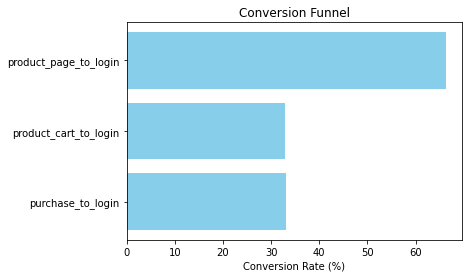

In [20]:
# Step 4: Visualize Conversion Funnel
labels = list(conversion_rates.keys())
conversion_values = list(conversion_rates.values())

plt.barh(labels, conversion_values, color='skyblue')
plt.xlabel('Conversion Rate (%)')
plt.title('Conversion Funnel')
plt.show()

### Is the number of events per user distributed equally among the samples?

In [21]:
# Calculate the number of events per user
events_per_user = df_events.groupby('user_id')['event_name'].count()

# statistical summary for the number of events per user
events_per_user.describe()

count    58703.000000
mean         7.218728
std          4.122609
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         36.000000
Name: event_name, dtype: float64

**Gerneral Conclusion**
- The number of event per users varies from 1 to 36 events per user there yet the average is 7 evernts.
- The number of events per user distributed **NOT** equally among the samples

### Are there users who are present in both samples?

In [22]:
# Get user IDs in the control group
control_users = set(df_participants[df_participants['group'] == 'A']['user_id'])

# Get user IDs in the test group
test_users = set(df_participants[df_participants['group'] == 'B']['user_id'])

# Find common users between the control and test groups
common_users = control_users.intersection(test_users)

# Count the number of users present in both samples
num_common_users = len(common_users)

# Display the count
print("Number of users present in both samples:", num_common_users)


Number of users present in both samples: 441


**Gerneral Conclusion**

Yes there are 441 users present in both samples

### How is the number of events distributed among days?

In [23]:
# Extract the date from the 'event_dt' column
df_events['event_date'] = df_events['event_dt'].dt.date

# Calculate the number of events per day
events_per_day = df_events.groupby('event_date')['event_name'].count()

# Display the result
events_per_day

event_date
2020-12-07    11385
2020-12-08    12547
2020-12-09    12122
2020-12-10    14077
2020-12-11    13864
2020-12-12    17634
2020-12-13    20985
2020-12-14    26184
2020-12-15    23469
2020-12-16    20909
2020-12-17    21751
2020-12-18    22871
2020-12-19    24273
2020-12-20    26425
2020-12-21    32559
2020-12-22    29472
2020-12-23    26108
2020-12-24    19399
2020-12-26    14058
2020-12-27    12420
2020-12-28    11014
2020-12-29    10146
2020-12-30       89
Name: event_name, dtype: int64

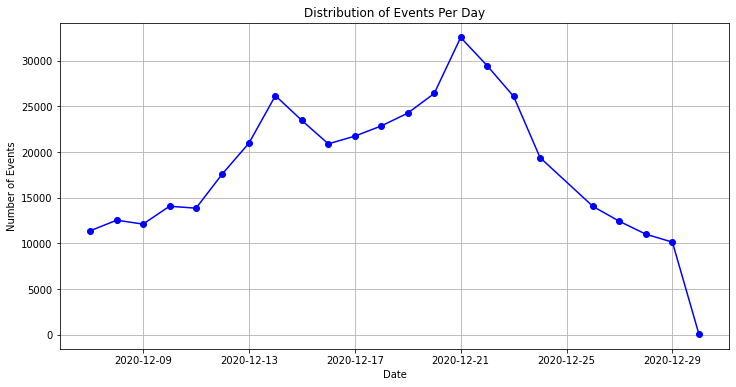

In [24]:
# Plotting the distribution of events per day
plt.figure(figsize=(12, 6))
events_per_day.plot(marker='o', linestyle='-', color='b')
plt.title('Distribution of Events Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

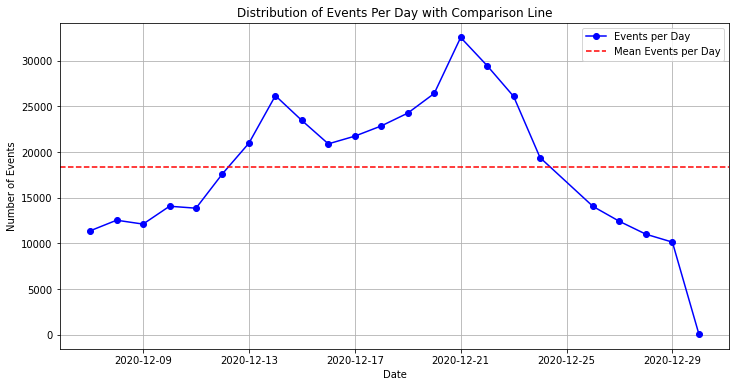

In [25]:
# Plotting the distribution of events per day with a comparison line
plt.figure(figsize=(12, 6))
events_per_day.plot(marker='o', linestyle='-', color='b', label='Events per Day')
plt.axhline(y=events_per_day.mean(), color='r', linestyle='--', label='Mean Events per Day')

plt.title('Distribution of Events Per Day with Comparison Line')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

###  Are there any peculiarities in the data that you have to take into account before starting the A/B test?

In [26]:
df_participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [27]:
# Count group column
group_counts = df_participants['group'].value_counts()

display(group_counts)

# Calculate percentage distribution
percentage_distribution = group_counts / group_counts.sum() * 100

# Display the result
print("Percentage Distribution of Group A and Group B:")
print(f"Group A: {percentage_distribution['A']:.2f}%")
print(f"Group B: {percentage_distribution['B']:.2f}%")

A    8214
B    6311
Name: group, dtype: int64

Percentage Distribution of Group A and Group B:
Group A: 56.55%
Group B: 43.45%


In [28]:
# Merge df_participants and df_events on 'user_id'
merged_data = pd.merge(df_participants, df_events, on='user_id', how='inner')

#Display merged data
display(merged_data)

,user_id,group,ab_test,event_dt,event_name,details,event_date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,4.99,2020-12-07
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,4.99,2020-12-07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,4.99,2020-12-07
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,4.99,2020-12-20
...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,4.99,2020-12-23
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,4.99,2020-12-14
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,4.99,2020-12-15
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,4.99,2020-12-16


In [29]:
# Count the occurrences of each group for each event
group_event_counts = merged_data.groupby(['group', 'event_name']).size().unstack()

# Calculate percentage distribution for each group and event
percentage_distribution_events = group_event_counts.div(group_event_counts.sum(axis=1), axis=0) * 100

# Display the result
print("Percentage Distribution of Group A and Group B for Each Event:")
display(percentage_distribution_events)

Percentage Distribution of Group A and Group B for Each Event:


event_name,login,product_cart,product_page,purchase
group,,,,
A,43.256963,13.666638,28.394515,14.681884
B,43.756373,14.263703,27.852174,14.127750


In [30]:
#count ab_test column
ab_test_counts = df_participants['ab_test'].value_counts()
print(ab_test_counts)

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64


**Gerneral Conclusion**

- Groups A and B are unevently distributed
    - Group A participants    8214 (56.55%)
    - Group A participants    6311 (43.45%)

- The Expected number of test participants: 6000 - the data exceeds this
- There isnt much data for the date: 2020-12-30
- There are 441 users present in both samples

## Testing hypotheses

The relaunching of an A/B test  for an international online store

**The Technical description left from the previous test:**

- Test name: `recommender_system_test`
- Groups: А (control), B (new payment funnel)
- Launch date: 2020-12-07
- Date when they stopped taking up new users: 2020-12-21
- End date: 2021-01-01
- Audience: 15% of the new users from the EU region
- Purpose of the test: testing changes related to the introduction of an improved recommendation system
- Expected result: within 14 days of signing up, users will show better conversion into product page views (the `product_page` event), instances of adding items to the shopping cart (`product_cart`), and purchases (`purchase`). At each stage of the funnel `product_page → product_cart → purchase`, there will be at least a 10% increase.
- Expected number of test participants: 6000

In [32]:
#Display merged data
display(merged_data)

,user_id,group,ab_test,event_dt,event_name,details,event_date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,4.99,2020-12-07
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,4.99,2020-12-07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,4.99,2020-12-07
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,4.99,2020-12-20
...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-23 13:03:17,login,4.99,2020-12-23
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14 19:12:49,login,4.99,2020-12-14
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-15 01:50:22,login,4.99,2020-12-15
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-16 19:27:36,login,4.99,2020-12-16


### Evaluate the A/B test results:

#### What can you say about the A/B test results?

This A/B test may need to be re-run due to a few errors in the presented data:

Namely:
- Overlap of Users in the groups
    - There are 441 users present in both samples
- Uneven Distribution:
    - Group A participants 8214 (56.55%)
    - Group A participants 6311 (43.45%)

#### Use a z-test to check the statistical difference between the proportions.

**Define Hypotheses:**

- Null Hypothesis (H0): There is no significant difference in conversion rates between Group A and Group B.
- Alternative Hypothesis (H1): There is a significant difference in conversion rates between Group A and Group B.

**Calculate Conversion Rates:**

In [33]:
# Convert 'user_id' column to numeric type
merged_data['user_id'] = pd.to_numeric(merged_data['user_id'], errors='coerce')

# Calculate conversion rates for Group A and Group B
conversion_rate_A = merged_data[merged_data['group'] == 'A']['user_id'].nunique() / len(df_participants[df_participants['group'] == 'A']) * 100
conversion_rate_B = merged_data[merged_data['group'] == 'B']['user_id'].nunique() / len(df_participants[df_participants['group'] == 'B']) * 100

# Display conversion rates
print(f'Conversion Rate for Group A to login: {conversion_rate_A:.2f}%')
print(f'Conversion Rate for Group B to login: {conversion_rate_B:.2f}%')

Conversion Rate for Group A to login: 0.16%
Conversion Rate for Group B to login: 0.08%


**Perform Z-test:**

In [34]:
# Perform t-test
t_stat, p_value = ttest_ind(
    merged_data[merged_data['group'] == 'A']['user_id'].dropna(),
    merged_data[merged_data['group'] == 'B']['user_id'].dropna(),
    equal_var=False
)

# Display t-test results
print(f'T-Statistic: {t_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

T-Statistic: 1.4213
P-Value: 0.1583


In [35]:
# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in conversion rates between Group A and Group B.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in conversion rates between Group A and Group B.")

Fail to reject the null hypothesis. There is no significant difference in conversion rates between Group A and Group B.


**Perform Mann-Whitney U Test:**

In [36]:
# Perform Mann-Whitney U Test on the 'details' column
u_stat, p_value_mannwhitney = mannwhitneyu(
    merged_data[merged_data['group'] == 'A']['details'].dropna(),
    merged_data[merged_data['group'] == 'B']['details'].dropna()
)

# Display Mann-Whitney U Test results
print(f'Mann-Whitney U Statistic: {u_stat:.4f}')
print(f'P-Value (Mann-Whitney U Test): {p_value_mannwhitney:.4f}')

# Determine significance
alpha_mannwhitney = 0.05
if p_value_mannwhitney < alpha_mannwhitney:
    print("Reject the null hypothesis. There is a significant difference in the 'details' between Group A and Group B.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the 'details' between Group A and Group B.")


Mann-Whitney U Statistic: 1298399903.0000
P-Value (Mann-Whitney U Test): 0.0531
Fail to reject the null hypothesis. There is no significant difference in the 'details' between Group A and Group B.


# Conclusion

**A/B test results:**

**Conversion Rates:**

- Conversion Rate for Group A to login: 0.16%
- Conversion Rate for Group B to login: 0.08%

The conversion rate for Group A to login (0.16%) is higher than that of Group B (0.08%). This suggests that a higher proportion of users in Group A successfully logged in compared to Group B.

**Z-test:**

- T-Statistic: 1.4213
- P-Value: 0.1583

The Z-test compares the means of two samples and assesses whether they are significantly different from each other. With a T-statistic of 1.4213 and a corresponding p-value of 0.1583, we fail to reject the null hypothesis at a conventional significance level of 0.05. This indicates that there is no significant difference in login conversion rates between Group A and Group B based on the Z-test.

**Mann-Whitney U Test:**

- Mann-Whitney U Statistic: 1298399903.0000
- P-Value (Mann-Whitney U Test): 0.0531

The Mann-Whitney U test is a test that compares two independent samples and assesses whether they come from the same population. The U statistic is 1298399903.0000, and the p-value is 0.0531. With a significance level of 0.05, the p-value is marginally above the threshold and therefore not statistically significant.

**General Conclusion**

There is no difference between the group A and B, we cannot make a suggestion of what as to the introduction of an improved recommendation system. However further investigation or consideration of other factors may be necessary to draw more infomation to analyse the two groups.

# Link to Presentation (.pdf)

https://drive.google.com/file/d/1Z8HqmG6cbSzoswO4G1jlZHYte_mVwPO-/view?usp=sharing